### Joint Midterm Notebook - 311 Road Service Requests in 2009 and 2019

### Time to Close Comparison

This notebook aims to build off work from our individual notebeook to create two interactive maps, one for 2009 and one for 2019, that plot all closed 311 requests, with a filter for duration of time to close the request.

**Data Import**

In [23]:
# for data wrangling
import pandas as pd

# to read and visualize spatial data
import geopandas as gpd

# for basemaps 
import contextily as ctx

# to for advanced plotting
import matplotlib.pyplot as plt

# for interactive plots
import plotly.express as px

In [1]:
##Here I'm gathering the gdf of all requests from 2019 that have been closed.
ClosedTime2019gdf = gpd.read_file('NoOpen2019gdf.geojson')
ClosedTime2019gdf.head()

NameError: name 'gpd' is not defined

So I know the values have a really wide range so in order to make this work visually, I'm going to need to create some bins to group the distrobution. 

In [3]:
##I'm creating 8 bins from the time to close column to group complaint response times.
pd.qcut(ClosedTime2019gdf['Time to Close'], q=8)

NameError: name 'pd' is not defined

In [27]:
##Now I'm making a new column with those bins.
ClosedTime2019gdf['close_bins'] = pd.qcut(ClosedTime2019gdf['Time to Close'], q=8)

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,Time to Close,LAT,LONG,geometry,close_bins
0,927576,7/23/19 15:38,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/26/19 13:45,6055962.501,2132386.75,CCD1,12Y,3,37.838160,-122.251303,POINT (-122.25130 37.83816),"(-0.001, 3.0]"
1,918469,6/25/19 08:34,SeeClickFix,Streets - Guardrail Repair,STREETSW,CLOSED,,7/10/19 18:11,6063364.409,2136673.615,CCD1,13Y,15,37.850308,-122.225949,POINT (-122.22595 37.85031),"(7.0, 16.0]"
2,922854,7/9/19 12:17,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/22/19 16:40,6055410.001,2116416.751,CCD2,19X,13,37.794280,-122.252180,POINT (-122.25218 37.79428),"(7.0, 16.0]"
3,926601,7/20/19 15:18,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/25/19 09:17,6050831.438,2132866.86,CCD1,11X,5,37.839213,-122.269099,POINT (-122.26910 37.83921),"(3.0, 7.0]"
4,924666,7/15/19 10:07,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/18/19 17:40,6070383,2112614.251,CCD4,24Y,3,37.784598,-122.200131,POINT (-122.20013 37.78460),"(-0.001, 3.0]"


In [34]:
##I'm going to sort the data by my new bins so that the legend in the map shows up in order.
ClosedTime2019gdf = ClosedTime2019gdf.sort_values(by='close_bins',ascending = True)
ClosedTime2019gdf.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,STATUS,REFERREDTO,DATETIMECLOSED,SRX,SRY,COUNCILDISTRICT,BEAT,Time to Close,LAT,LONG,geometry,close_bins
3777,928990,7/28/19 19:02,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,7/30/19 06:15,6054832.646,2131573.798,CCD1,12Y,2,37.835869,-122.255162,POINT (-122.25516 37.83587),"(-0.001, 3.0]"
1851,883987,3/6/19 16:04,Phone,Streets/Sidewalks - Curb & Gutter Repair,STREETSW,CLOSED,,3/9/19 11:20,6069407.867,2118845.598,CCD4,22Y,3,37.801659,-122.203897,POINT (-122.20390 37.80166),"(-0.001, 3.0]"
2006,884348,3/7/19 16:49,SeeClickFix,Streets - Potholes/Depression,STREETSW,CLOSED,,3/8/19 13:43,6054426.09,2117910.903,CCD2,19X,1,37.798332,-122.255682,POINT (-122.25568 37.79833),"(-0.001, 3.0]"
1994,879770,2/19/19 17:31,Email,Streets - Mudslides/Landslides,STREETSW,CLOSED,,2/19/19 17:32,6070906.535,2135479.949,,13Y,0,37.847410,-122.199756,POINT (-122.19976 37.84741),"(-0.001, 3.0]"
1984,883521,3/5/19 13:12,Phone or Email,Streets - Potholes/Depression,STREETSW,CLOSED,,3/8/19 13:40,6077863,2095162.75,CCD7,32X,3,37.737048,-122.173171,POINT (-122.17317 37.73705),"(-0.001, 3.0]"


Now I'll repeat the steps above for the 2009 data.

In [2]:
ClosedTime2009gdf = gpd.read_file('Closed2009.geojson')
ClosedTime2009gdf.head()

NameError: name 'gpd' is not defined

In [36]:
pd.qcut(ClosedTime2009gdf['TIMETOCLOSE'], q=8)

0      (255.438, 2508.4]
1      (255.438, 2508.4]
2      (255.438, 2508.4]
3      (255.438, 2508.4]
4      (255.438, 2508.4]
             ...        
483        (-0.001, 6.0]
484        (-0.001, 6.0]
485        (-0.001, 6.0]
486        (-0.001, 6.0]
487        (-0.001, 6.0]
Name: TIMETOCLOSE, Length: 488, dtype: category
Categories (8, interval[float64, right]): [(-0.001, 6.0] < (6.0, 13.975] < (13.975, 24.962] < (24.962, 51.5] < (51.5, 102.875] < (102.875, 160.375] < (160.375, 255.438] < (255.438, 2508.4]]

In [38]:
ClosedTime2009gdf['close_bins'] = pd.qcut(ClosedTime2009gdf['TIMETOCLOSE'], q=8)

In [39]:
ClosedTime2009gdf = ClosedTime2009gdf.sort_values(by='close_bins',ascending = True)
ClosedTime2009gdf.head()

,REQUESTID,DATETIMEINIT,SOURCE,DESCRIPTION,REQCATEGORY,LAT,LONG,STATUS,DATETIMECLOSED,COUNCILDISTRICT,PROBADDRESS,City,State,TIMETOCLOSE,geometry,close_bins
487,"323,244",12/6/2009 16:28,Phone or Email,Streets - Potholes/Depression,STREETSW,37.846023,-122.254899,CLOSED,12/6/2009 16:30,CCD1,5800 CLAREMONT AVE,Oakland,CA,0.0,POINT (-122.25490 37.84602),"(-0.001, 6.0]"
453,"317,253",10/2/2009 10:20,Phone or Email,Streets - Potholes/Depression,STREETSW,37.800687,-122.247731,CLOSED,10/6/2009 11:17,CCD2,E 21ST ST & PARK BLVD,Oakland,CA,4.0,POINT (-122.24773 37.80069),"(-0.001, 6.0]"
452,"310,358",7/16/2009 8:35,Phone or Email,Streets - Potholes/Depression,STREETSW,37.846671,-122.250276,CLOSED,7/20/2009 9:45,CCD1,5870 BIRCH CT,Oakland,CA,4.0,POINT (-122.25028 37.84667),"(-0.001, 6.0]"
451,"324,078",12/16/2009 11:36,Phone or Email,Streets - Potholes/Depression,STREETSW,37.774792,-122.236031,CLOSED,12/20/2009 17:11,CCD5,2800 CHAPMAN ST,Oakland,CA,4.2,POINT (-122.23603 37.77479),"(-0.001, 6.0]"
450,"316,722",9/28/2009 9:24,Phone or Email,Streets - Potholes/Depression,STREETSW,37.845334,-122.251955,CLOSED,10/2/2009 15:41,CCD1,5701 COLLEGE AV,Oakland,CA,4.3,POINT (-122.25196 37.84533),"(-0.001, 6.0]"


In [4]:
##Map time! Using plotly express with a white background so the colors stand out.

fig = px.scatter_mapbox(ClosedTime2009gdf, 
                        lat="LAT", 
                        lon="LONG", 
                        color="close_bins",
                        labels={'close_bins':'Days to Close Request'}
                       )
fig.update_layout(mapbox_style="carto-positron")
fig.show()

NameError: name 'px' is not defined

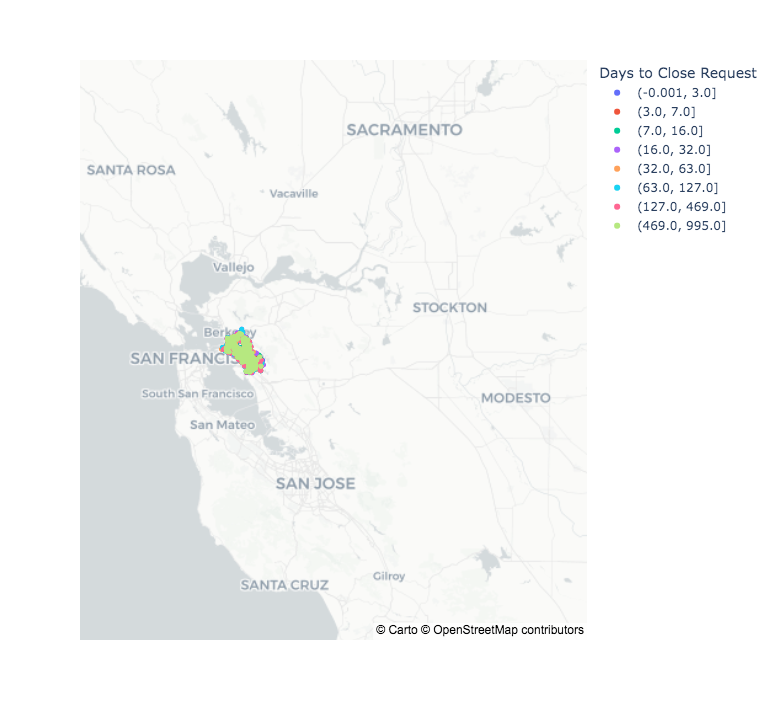

In [46]:
fig = px.scatter_mapbox(ClosedTime2019gdf, 
                        lat="LAT", 
                        lon="LONG", 
                        color="close_bins",
                        labels={'close_bins':'Days to Close Request'}
                       )
fig.update_layout(mapbox_style="carto-positron")
fig.show()

T